In [1]:
%load_ext lab_black

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm, normaltest

%matplotlib inline

In [18]:
def tidy_split(df, column, sep=",", keep=False):
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return(new_df)

In [6]:
df = pd.read_csv("data_basic.csv")

In [7]:
sns.set_style("white")

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


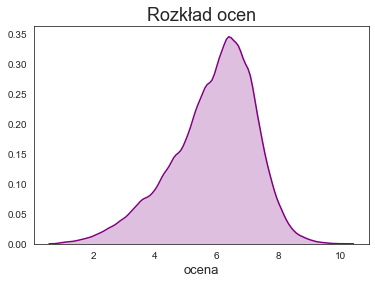

In [8]:
sns.kdeplot(df.averageRating, shade=True, color="purple", kernel="gau", legend=False)
plt.title("Rozkład ocen", fontsize=18)
plt.xlabel("ocena", fontsize=13)
plt.savefig("rozklad_ocen.png")
plt.show()

In [9]:
df.averageRating.median()

6.1

In [11]:
np.round(df.averageRating.mean(),2)

5.89

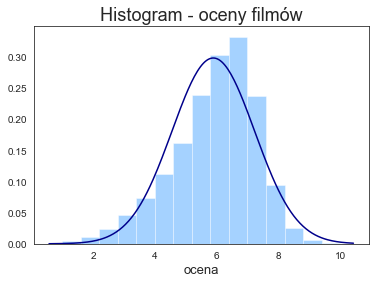

In [12]:
sns.distplot(
    df.averageRating,
    bins=15,
    kde=False,
    fit=norm,
    fit_kws={"color": "darkblue"},
    color="dodgerblue",
)
plt.title("Histogram - oceny filmów", fontsize=18)
plt.xlabel("ocena", fontsize=13)
plt.savefig("hist.png")
plt.show()

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


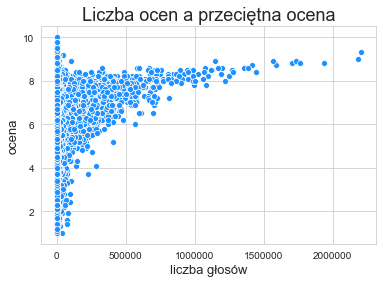

In [13]:
df_to_pair = df[["averageRating", "numVotes"]]
df_to_pair.numVotes = df_to_pair.numVotes.astype("int64")
sns.set_style("whitegrid")
sns.scatterplot(df.numVotes, df.averageRating, color="dodgerblue")
plt.title("Liczba ocen a przeciętna ocena", fontsize=18)
plt.xlabel("liczba głosów", fontsize=13)
plt.ylabel("ocena", fontsize=13)
plt.ylim(0.5, 10.5)
plt.savefig("zal.png")
plt.show()

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


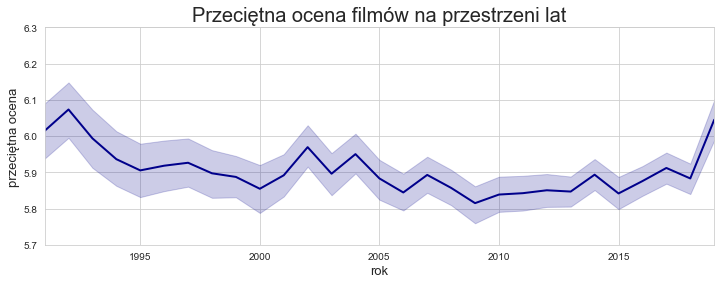

In [14]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    df.startYear, df.averageRating, linewidth=2, color="darkblue",
)
plt.xlim(1991, 2019)
plt.title("Przeciętna ocena filmów na przestrzeni lat", fontsize=20)
plt.xlabel("rok", fontsize=13)
plt.ylabel("przeciętna ocena", fontsize=13)
plt.ylim(5.7, 6.3)
plt.savefig("ocena_lata.png")
plt.show()

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


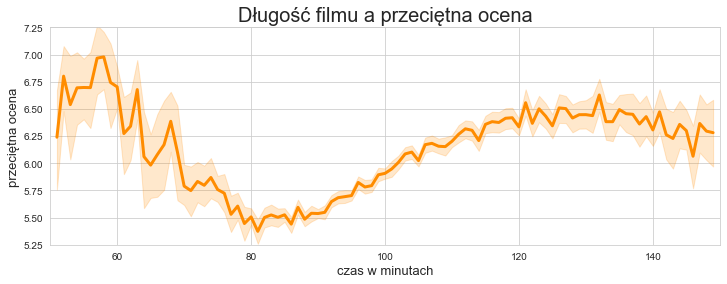

In [15]:
df.runtimeMinutes = df.runtimeMinutes.replace({"no value": np.nan})
df.runtimeMinutes = pd.to_numeric(df.runtimeMinutes)
df2 = df[df.runtimeMinutes < 150][df.runtimeMinutes > 50]
plt.figure(figsize=(12, 4))
sns.lineplot(
    df2.runtimeMinutes, df2.averageRating, color="darkorange", linewidth=3,
)
plt.title("Długość filmu a przeciętna ocena", fontsize=20)
plt.xlim(50, 150)
plt.xlabel("czas w minutach", fontsize=13)
plt.ylabel("przeciętna ocena", fontsize=13)
plt.ylim(5.25, 7.25)
plt.savefig("ocena_czas.png")
plt.show()

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


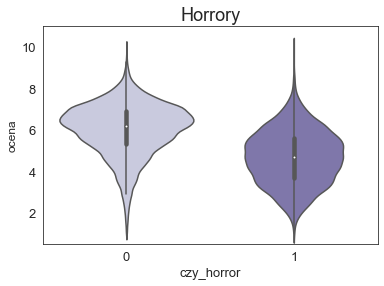

In [19]:
sns.set_style("white")
sns.violinplot(df.Horror, df.averageRating, palette="Purples")
plt.title("Horrory", fontsize=18)
plt.ylabel("ocena", fontsize=12)
plt.xlabel("czy_horror", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0.5, 11)
plt.savefig("horror.png")
plt.show()

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


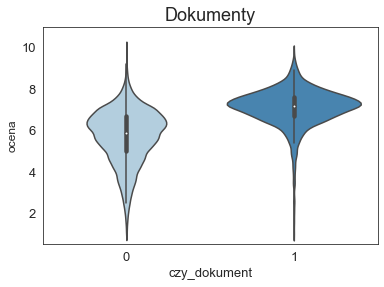

In [20]:
sns.violinplot(df.Documentary, df.averageRating, palette="Blues")
plt.title("Dokumenty", fontsize=18)
plt.ylabel("ocena", fontsize=12)
plt.xlabel("czy_dokument", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0.5, 11)
plt.savefig("dokument.png")
plt.show()

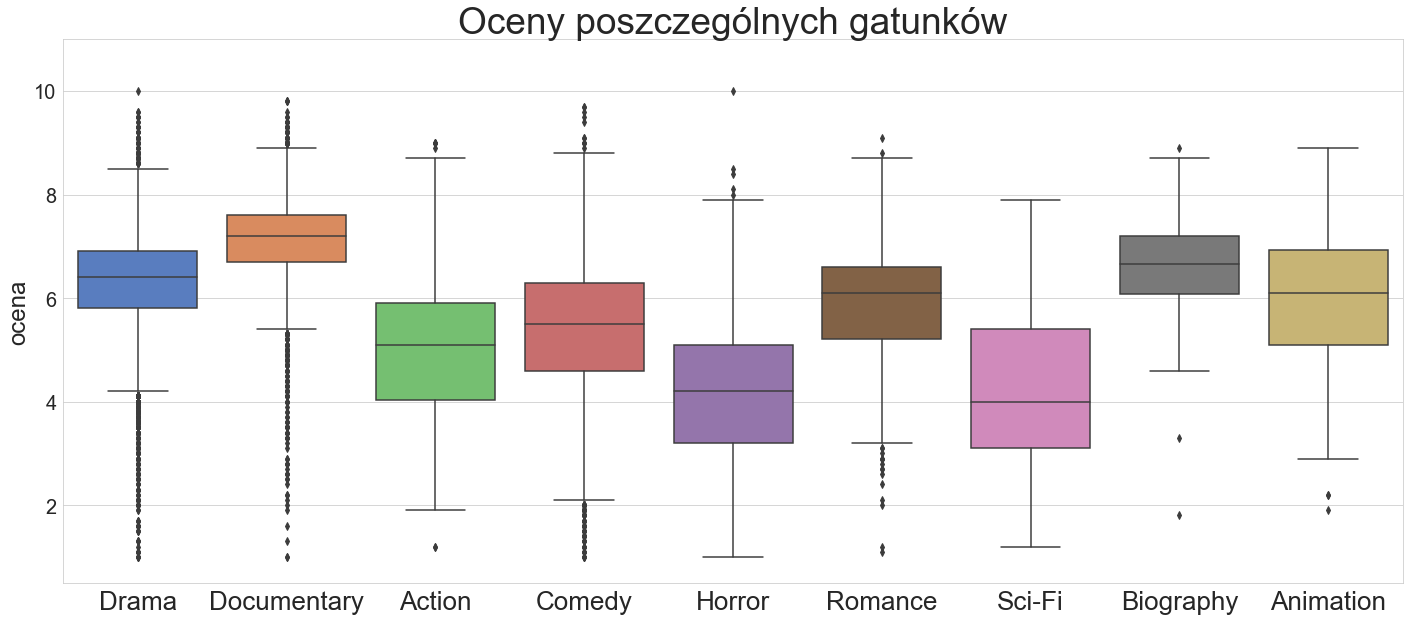

In [363]:
plt.figure(figsize=(24, 10))
sns.boxplot(x="rating", y="genre", data=b, palette="muted")
plt.title("Oceny poszczególnych gatunków", fontsize=37)
plt.ylabel("ocena", fontsize=24)
plt.xlabel("", fontsize=15)
plt.xticks(fontsize=26)
plt.yticks(fontsize=20)
plt.ylim(0.5, 11)
plt.savefig("gatunki_skrzypce.png")
plt.show()

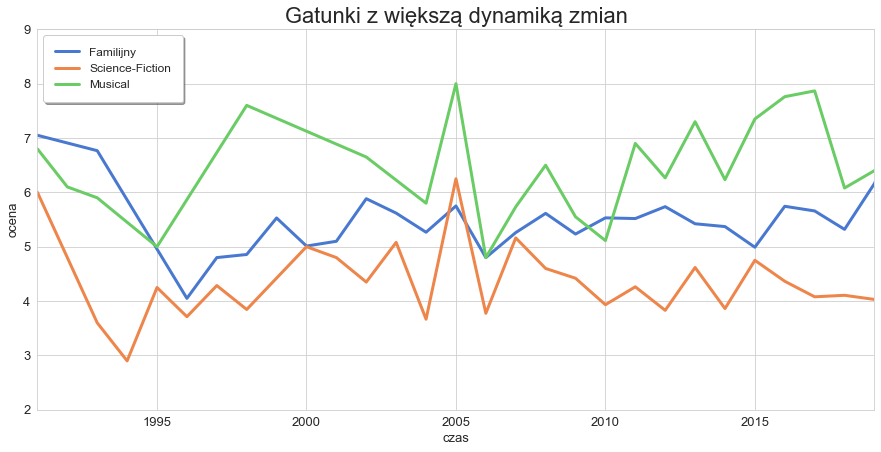

In [465]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
sns.lineplot(
    y="averageRating",
    x="startYear",
    hue="genres",
    data=hoho,
    linewidth=3,
    ci=None,
    palette="muted",
)
plt.title("Gatunki z większą dynamiką zmian", fontsize=22)
plt.ylabel("ocena", fontsize=13)
plt.xlabel("czas", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(2, 9)
plt.xlim(1991, 2019)
plt.legend(
    fontsize=12,
    loc="upper left",
    labels=["Familijny", "Science-Fiction", "Musical"],
    fancybox=True,
    framealpha=1,
    shadow=True,
    borderpad=1,
)
plt.savefig("k2.png")
plt.show()

In [516]:
df_region = df[
    [
        "averageRating",
        "AR",
        "AT",
        "AU",
        "BE",
        "BG",
        "BR",
        "CA",
        "TR",
        "TW",
        "UA",
        "US",
        "XWW",
        "DE",
        "PL",
        "GB",
        "HU",
        "MX",
        "JP",
        "IT",
        "RU",
    ]
]

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


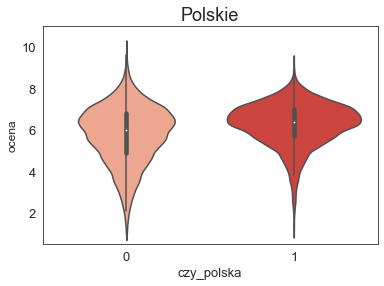

In [529]:
sns.set_style("white")
sns.violinplot(df_region.PL, df_region.averageRating, palette="Reds")
plt.title("Polskie", fontsize=18)
plt.ylabel("ocena", fontsize=12)
plt.xlabel("czy_polska", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0.5, 11)
plt.savefig("pl.png")
plt.show()

In [24]:
df[["originalTitle", "averageRating", "numVotes"]][df.numVotes > 1400000]

,originalTitle,averageRating,numVotes
2645,Forrest Gump,8.8,1701979.0
3000,Pulp Fiction,8.9,1732367.0
3083,The Shawshank Redemption,9.3,2205126.0
6208,The Lord of the Rings: The Fellowship of the Ring,8.8,1578419.0
6795,The Matrix,8.7,1587338.0
6932,Fight Club,8.8,1760591.0
8074,The Lord of the Rings: The Return of the King,8.9,1566425.0
8075,The Lord of the Rings: The Two Towers,8.7,1414348.0
21777,The Dark Knight,9.0,2185433.0
32690,The Dark Knight Rises,8.4,1446511.0


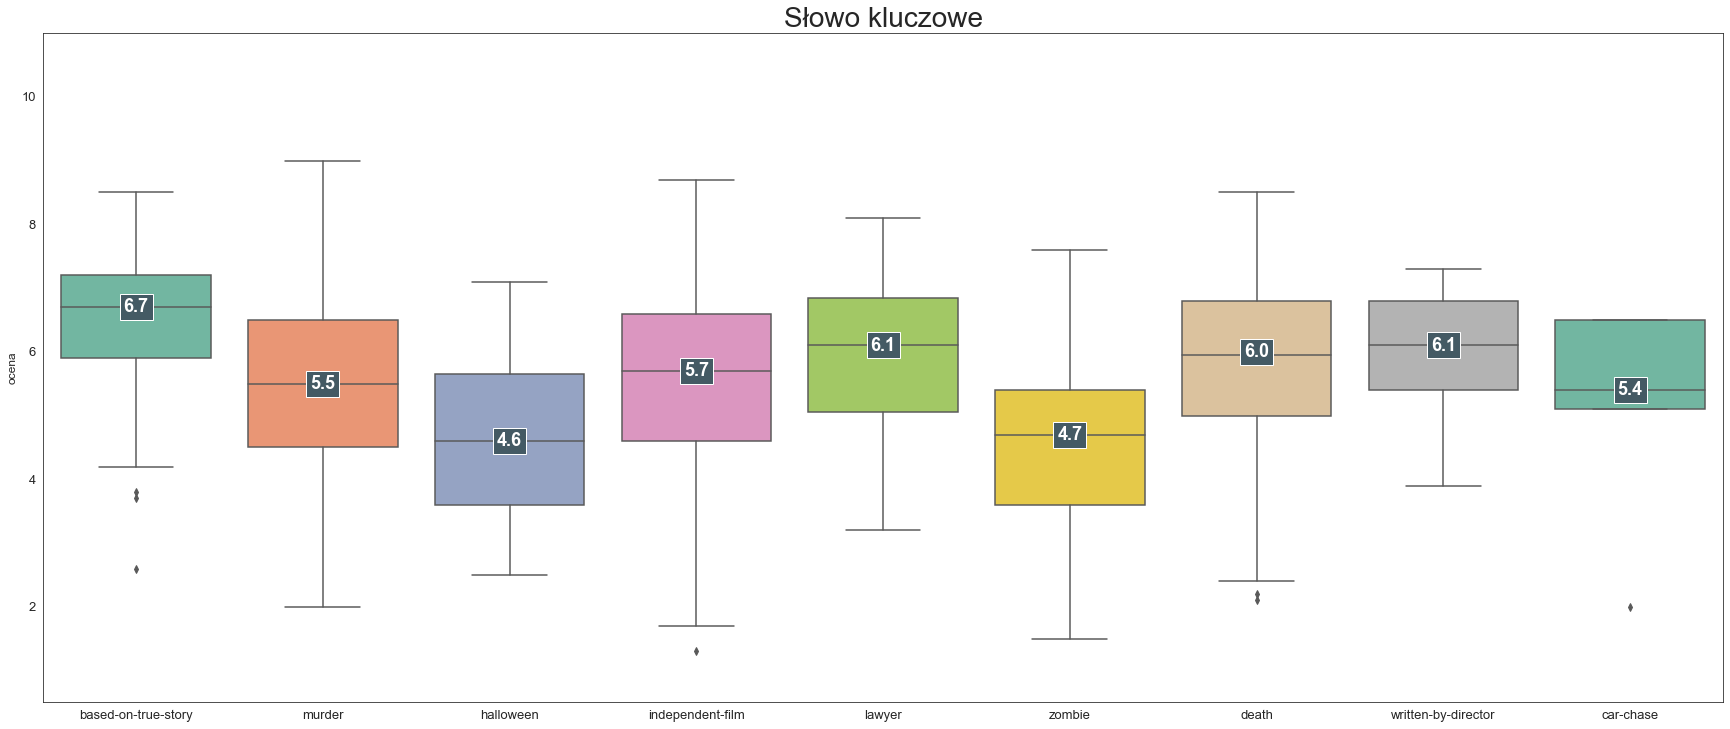

In [27]:
keywords_all = pd.read_csv("keywords_processed.csv")
keywords_analysis = tidy_split(keywords_all, "keywords", sep=",")
keywords_analysis = keywords_analysis.merge(
    df[["tconst", "originalTitle", "averageRating"]],
    how="left",
    left_on="title",
    right_on="originalTitle",
)
keywords_analysis = keywords_analysis[["keywords", "averageRating"]]
keywords_to_plot = keywords_analysis[
    keywords_analysis.keywords.isin(
        [
            "murder",
            "halloween",
            "death",
            "independent-film",
            "based-on-true-story",
            "car-chase",
            "zombie",
            "lawyer",
            "written-by-director",
        ]
    )
]
plt.figure(figsize=(24, 10))
box_plot = sns.boxplot(
    "keywords", "averageRating", data=keywords_to_plot, palette="Set2"
)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4 + cat * 6].get_ydata()[0], 1)
    ax.text(
        cat,
        y,
        f"{y}",
        ha="center",
        va="center",
        fontweight="semibold",
        size=18,
        color="white",
        bbox=dict(facecolor="#445A64"),
    )

box_plot.figure.tight_layout()
plt.title("Słowo kluczowe", fontsize=28)
plt.ylabel("ocena", fontsize=12)
plt.xlabel("", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0.5, 11)
plt.savefig("kluczowe_a_ocena.png")
plt.show()

In [ ]:
colorki = colorki[["averageRating", "colors"]]

In [ ]:
plt.figure(figsize=(8, 7))
box_plot = sns.boxplot(x="colors", y="averageRating", data=colorki, palette="Set2")
plt.title("Filmy kolorowe i czarno-białe", fontsize=18)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4 + cat * 6].get_ydata()[0], 1)
    ax.text(
        cat,
        y,
        f"{y}",
        ha="center",
        va="center",
        fontweight="semibold",
        size=13,
        color="white",
        bbox=dict(facecolor="#445A64"),
    )

box_plot.figure.tight_layout()
plt.ylabel("ocena", fontsize=12)
plt.xlabel("", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0.5, 11)
plt.savefig("kolor.png")
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
splot = sns.countplot(
    x="colors", data=colorki, palette="Set2", linewidth=2, edgecolor="#445A64"
)
plt.title("Liczebności filmów", fontsize=18)
plt.ylabel("liczba filmów", fontsize=12)
plt.xlabel("", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for p in splot.patches:
    splot.annotate(
        format(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontweight="semibold",
        size=13,
        color="#445A64",
    )
plt.savefig("kolor_count.png")
plt.show()